In [24]:
import pandas as pd
import numpy as np

In [25]:
# https://medium.com/@omairaasim/machine-learning-project-15-decision-tree-classifier-step-by-step-aaaae0c2a111

In [26]:
df = pd.read_csv('Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [27]:
# We will be using a classification decision tree for this project. 
# We can do this because our data needs to be classified into the categories "Yes or No"
# We can also use a Logistic Regression for this type of data

In [28]:
# set variables
X = df.iloc[:, :-1].values
y = df.iloc[:, 5].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, 8.581e+02, 8.455e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, 1.265e+03, 1.178e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, 1.810e+02, 5.263e-02]])

In [29]:
X1 = df[['mean_radius', 'mean_texture']]
X1

,mean_radius,mean_texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [30]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
# fit decision tree classifer
# a classifier is like a class we create to fit the training data
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [47]:
# make predictions with test data
y_pred = classifier.predict(X_test)
# df1 = pd.concat([X_test.reset_index(drop = 'True'), y_pred.reset_index(drop = 'True')], axis=1)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [33]:
# make predictions
patient1 = [[10, 7.8, 200.02, 1200.6, 0.087]]
classifier.predict(patient1)

array([0], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

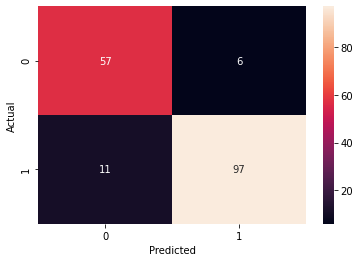

In [50]:
# confusion matrix to check accuracy of model
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [61]:
# Calculate accuracy, precision, recall
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# compare the predictions against the y_test values from the dataset

# accuracy
# ratio of correctly predicted observations in y_test and y_pred
# how many of the y_pred predictions were the same as the y_test ones?
# accounts for both the true positives and true negatives
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy score is:", accuracy)

# precision
# ratio of correctly predicted positive observations against total predicted positve observations
# looks at positive observations
# of all the people labeled with having breast cancer, how many actually had it?
# true positives / true positives + false positives
precision = precision_score(y_test, y_pred)
print("The precision score is:", precision)

# recall / sensitivity of results
# find relevant cases within data set (when an outcome group is sig smaller)
# ratio of correctly predicted positve observations to all the ones actually positive
# of all the patients who have breast cancer, how many did we truly label --> find relevant point in dataset
# true positive / true positive + false negative
# true results / all results that are truly true (false negative, assume not but actually is)
recall = recall_score(y_test, y_pred)
print("The recall score is:" , recall)

# f1 score
f1 = f1_score(y_test, y_pred)
print("The f1 score is:" , f1)

The accuracy score is: 0.9005847953216374
The precision score is: 0.941747572815534
The recall score is: 0.8981481481481481
The f1 score is: 0.9194312796208531


In [ ]:
# The data did pretty good all around using the classification decision tree supervised machine learning model!